In [ ]:
import scprep
scprep.io.download.download_google_drive('1VuddKA7Xa23NAFKvRUmtuND16eEMHL9z', '/content/r_packages.tar.gz')
!tar xzf /content/r_packages.tar.gz && rm /content/r_packages.tar.gz
!apt-get install -yqq libgsl-dev=2.4+dfsg-6
!echo "R_LIBS_USER='/content/.r_packages'" >> ~/.Renviron

In [1]:
import os
import zipfile
from urllib import request
download_path = os.path.expanduser("~")
print(download_path)

opener= request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0')]
request.install_opener(opener)

if not os.path.isdir(os.path.join(download_path, "scRNAseq", "T0_1A")):
    if not os.path.isdir(download_path):
        os.mkdir(download_path)
    zip_data = os.path.join(download_path, "scRNAseq.zip")
    if not os.path.isfile(zip_data):
        with request.urlopen("https://data.mendeley.com/datasets/v6n743h5ng"
                     "/1/files/7489a88f-9ef6-4dff-a8f8-1381d046afe3/scRNAseq.zip?dl=1") as url:
            print("Downloading data file...")
            # Open our local file for writing
            with open(zip_data, "wb") as handle:
                handle.write(url.read())
    print("Unzipping...")
    with zipfile.ZipFile(zip_data, 'r') as handle:
        handle.extractall(download_path)
    print("Done.")

/home/dan


In [2]:
import pandas as pd
import numpy as np
import phate
import scprep
import magic

import matplotlib.pyplot as plt
import seaborn as sns

import time

# matplotlib settings for Jupyter notebooks only
%matplotlib inline

sns.set_style('ticks')

In [ ]:
import pandas as pd
import umap
EBT_counts = pd.read_pickle('/orkney/home/dan/scRNAseq/EBT_counts.pkl.gz')
data_umap = umap.UMAP(n_components=3).fit_transform(EBT_counts.to_sparse(fill_value=0))

In [3]:
EBT_counts = pd.read_pickle('/home/dan/scRNAseq/EBT_counts.pkl.gz')

In [4]:
phate_op = phate.PHATE(knn=5, n_jobs=-2)

data_phate = phate_op.fit_transform(EBT_counts)
data_phate = pd.DataFrame(data_phate, index=EBT_counts.index)

Calculating PHATE...
  Running PHATE on 16821 cells and 17619 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 9.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 14.78 seconds.
    Calculating affinities...
    Calculated affinities in 0.33 seconds.
  Calculated graph and diffusion operator in 25.15 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.23 seconds.
    Calculating KMeans...
    Calculated KMeans in 22.61 seconds.
  Calculated landmark operator in 25.55 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 0.80 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.43 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 19.65 seconds.
Calculated PHATE in 71.59 seconds.


In [16]:
phate_op = phate.PHATE(knn=5, n_components=3, n_jobs=-2)

data_phate = phate_op.fit_transform(EBT_counts)
data_phate = pd.DataFrame(data_phate, index=EBT_counts.index)

Calculating PHATE...
  Running PHATE on 16821 cells and 17619 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.36 seconds.
    Calculating KNN search...
    Calculated KNN search in 16.79 seconds.
    Calculating affinities...
    Calculated affinities in 0.18 seconds.
  Calculated graph and diffusion operator in 26.81 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.10 seconds.
    Calculating KMeans...
    Calculated KMeans in 21.22 seconds.
  Calculated landmark operator in 24.08 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 0.75 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.26 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 51.49 seconds.
Calculated PHATE in 103.40 seconds.


In [5]:
slingshot_clusters = phate.cluster.kmeans(phate_op, n_clusters=8)

In [6]:
root = data_phate.sum(axis=1).values.argmax()


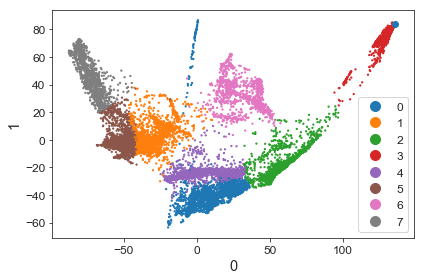

In [7]:
ax = scprep.plot.scatter2d(data_phate, c = slingshot_clusters)
root = data_phate.sum(axis=1).values.argmax()
ax.scatter(data_phate.iloc[root][0], data_phate.iloc[root][1])

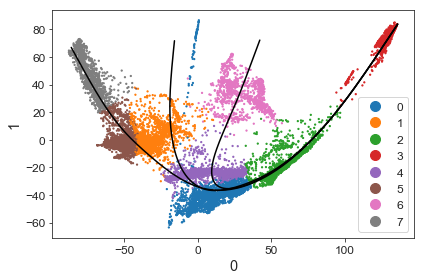

In [11]:
ax = scprep.plot.scatter2d(data_phate, c = slingshot_clusters)

for curve in curves:
    ax.plot(curve[:,0], curve[:,1], c='k')

In [17]:
pseudotime, branch, curves = scprep.run.Slingshot(data_phate, slingshot_clusters, start_cluster=3, 
                                                  end_cluster=[0,6,7])

R[write to console]: Using full covariance matrix


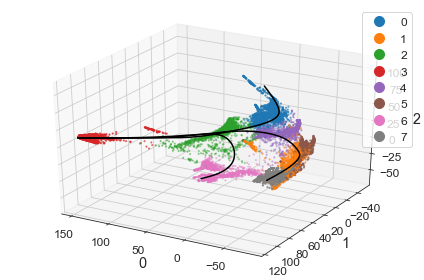

In [22]:
ax = scprep.plot.scatter3d(data_phate, c = slingshot_clusters, azim=120)

for curve in curves:
    ax.plot(curve[:,0], curve[:,1], curve[:,2], c='k')

In [23]:
import umap

data_umap = umap.UMAP(n_components=3).fit_transform(EBT_counts.to_sparse(fill_value=0))

In [ ]:
pseudotime_umap, branch_umap, curves_umap = scprep.run.Slingshot(data_phate, 
                                                  slingshot_clusters, start_cluster=3, 
                                                  end_cluster=[0,6,7])

In [27]:
import anndata, scanpy

adata = anndata.AnnData(EBT_counts)

adata.uns['iroot'] = root

scanpy.pp.neighbors(adata)
scanpy.tl.diffmap(adata)
scanpy.tl.dpt(adata)

dpt = adata.obs['dpt_pseudotime']

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [43]:
eb_clusters = phate.cluster.kmeans(phate_op, n_clusters=36)

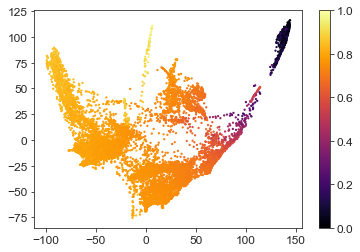

In [28]:
ax = scprep.plot.scatter2d(data_phate, c=dpt)


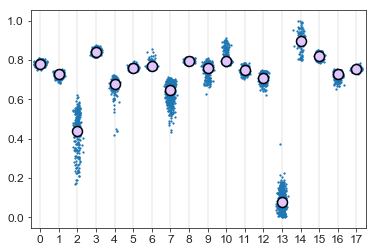

In [29]:
scprep.plot.jitter(clusters, dpt)

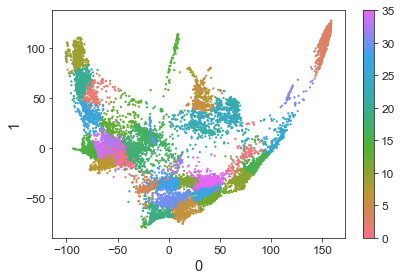

In [47]:
ax = scprep.plot.scatter2d(data_phate, c=eb_clusters, cmap=sns.husl_palette())


In [27]:
full_marker_genes = ['ARID3A (ENSG00000116017)', 'ASCL2 (ENSG00000183734)',  'CD34 (ENSG00000174059)',
 'CDX2 (ENSG00000165556)', 'CER1 (ENSG00000147869)', 'DLX1 (ENSG00000144355)',
 'DMRT3 (ENSG00000064218)', 'EN2 (ENSG00000164778)', 'EOMES (ENSG00000163508)',
 'FOXA2 (ENSG00000125798)', 'FOXD3-AS1 (ENSG00000230798)', 'GATA3-AS1 (ENSG00000197308)',
 'GATA4 (ENSG00000136574)', 'GATA5 (ENSG00000130700)', 'GATA6-AS1 (ENSG00000266010)',
 'GBX2 (ENSG00000168505)', 'GLI3 (ENSG00000106571)', 'HOXA2 (ENSG00000105996)',
 'HOXB1 (ENSG00000120094)', 'HOXB4 (ENSG00000182742)', 'HOXD13 (ENSG00000128714)',
 'HOXD9 (ENSG00000128709)', 'ISL1 (ENSG00000016082)', 'KLF5 (ENSG00000102554)',
 'KLF7 (ENSG00000118263)', 'LEF1 (ENSG00000138795)', 'LHX2 (ENSG00000106689)',
 'LHX5 (ENSG00000089116)', 'LMX1A (ENSG00000162761)', 'MAP2 (ENSG00000078018)',
 'MIXL1 (ENSG00000185155)', 'MYCBP (ENSG00000214114)', 'NANOG (ENSG00000111704)',
 'NES (ENSG00000132688)', 'NKX2-1 (ENSG00000136352)', 'NKX2-5 (ENSG00000183072)',
 'NKX2-8 (ENSG00000136327)', 'NPAS1 (ENSG00000130751)', 'NR2F1-AS1 (ENSG00000237187)',
 'OLIG1 (ENSG00000184221)', 'OLIG3 (ENSG00000177468)', 'ONECUT1 (ENSG00000169856)',
 'ONECUT2 (ENSG00000119547)', 'OTX2 (ENSG00000165588)', 'PAX3 (ENSG00000135903)',
 'PAX6 (ENSG00000007372)', 'PDGFRA (ENSG00000134853)', 'PECAM1 (ENSG00000261371)',
 'POU5F1 (ENSG00000204531)', 'SATB1 (ENSG00000182568)', 'SIX2 (ENSG00000170577)',
 'SIX3-AS1 (ENSG00000236502)', 'SIX6 (ENSG00000184302)', 'SOX13 (ENSG00000143842)',
 'SOX10 (ENSG00000100146)', 'SOX15 (ENSG00000129194)', 'SOX17 (ENSG00000164736)',
 'SOX9 (ENSG00000125398)', 'TTLL10 (ENSG00000162571)', 'TAL1 (ENSG00000162367)',
 'TBX15 (ENSG00000092607)', 'TBX18 (ENSG00000112837)', 'TBX5 (ENSG00000089225)',
 'TNNT2 (ENSG00000118194)', 'WT1 (ENSG00000184937)', 'ZBTB16 (ENSG00000109906)',
 'ZIC2 (ENSG00000043355)', 'ZIC5 (ENSG00000139800)', 'ACTB (ENSG00000075624)',
 'HAND1 (ENSG00000113196)']

In [35]:
import magic
data_magic = magic.MAGIC().fit_transform(EBT_counts)

Calculating MAGIC...
  Running MAGIC on 16821 cells and 17619 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 9.42 seconds.
    Calculating KNN search...
    Calculated KNN search in 32.03 seconds.
    Calculating affinities...
    Calculated affinities in 13.97 seconds.
  Calculated graph and diffusion operator in 56.69 seconds.
  Calculating imputation...
    Automatically selected t = 10
  Calculated imputation in 2.77 seconds.
Calculated MAGIC in 68.10 seconds.


In [37]:
data_magic.shape

(16821, 17619)

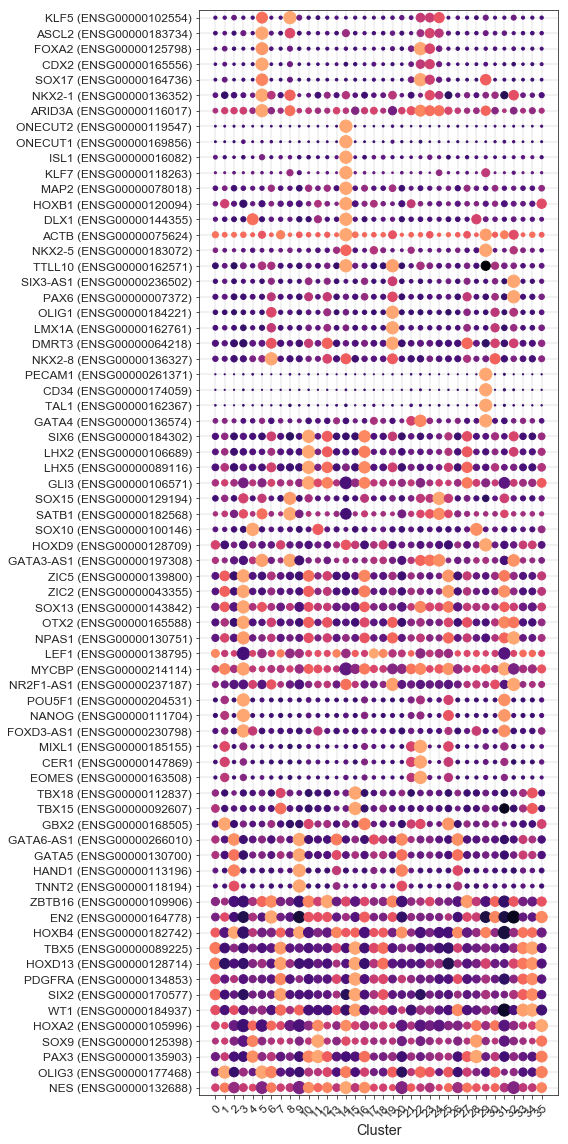

In [44]:
scprep.plot.marker_plot(data_magic, eb_clusters, full_marker_genes, figsize=(12,16), )

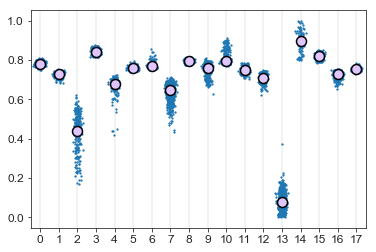

In [31]:
scprep.plot.jitter(clusters, dpt)